UPDATING TRAINING / DEPLY DATA

In [1]:
from tqdm import tqdm_notebook, tnrange
import pandas as pd
import numpy as np
from random import shuffle
import pandas as pd
%matplotlib inline
import os
import random
import itertools
import hickle as hkl
import yaml
import boto3
#os.environ['KMP_DUPLICATE_LIB_OK']='True'

### Update CEO SURVEY and label arrays

In [7]:
## THIS IS FOR CREATING THE PLOT FNAMES ex: 08001, 08002
import re 
import pandas as pd
import os



/var/folders/1v/8qs7l7157sddx1_9z9wqldrc0000gp/T/ipykernel_57623/3293819441.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PLOT_FNAME'][index] = f"{str(STR).zfill(2)}{str(counter).zfill(3)}"


In [8]:
df

,PLOT_ID,SAMPLE_ID,LON,LAT,SYSTEM,PLANTATION,PLOT_FNAME
0,0,-195,-0.296882,11.046963,Agroforestry,2,21001
1,0,-194,-0.296882,11.047053,Agroforestry,2,21001
2,0,-193,-0.296882,11.047142,Agroforestry,2,21001
3,0,-192,-0.296882,11.047232,Agroforestry,2,21001
4,0,-191,-0.296882,11.047322,Agroforestry,2,21001
...,...,...,...,...,...,...,...
50367,256,50172,-1.798633,9.090612,Agroforestry,2,21257
50368,256,50173,-1.798633,9.090702,Agroforestry,2,21257
50369,256,50174,-1.798633,9.090792,Agroforestry,2,21257
50370,256,50175,-1.798633,9.090882,Agroforestry,2,21257


In [4]:
print(f"{str('08').zfill(2)}{str(counter).zfill(3)}")

08225


In [2]:
## THIS ADDS A PLANTATION COLUMN MIRRORING SYSTEM
## for some reason v8 isnt cooperating
v = 'v20'
df = pd.read_csv(f'../../data/ceo-plantations-train-{v}.csv')
df['PLANTATION'] = df.SYSTEM.map({'Not plantation': 0, 
                                    'Monoculture': 1,
                                    'Agroforestry': 2,
                                    'Unknown': 255})
# df['SYSTEM'] = df.PLANTATION.map({0:'Not plantation', 
#                                   1:'Monoculture',
#                                   2: 'Agroforestry',
#                                   255:'Unknown'})
df.head()

,index,PLOT_ID,SAMPLE_ID,LON,LAT,EMAIL,FLAGGED,COLLECTION_TIME,ANALYSIS_DURATION,IMAGERY_TITLE,IMAGERY_ATTRIBUTIONS,SAMPLE_GEOM,SYSTEM,PLOT_FNAME,PLANTATION
0,0,0,-195,-0.894849,6.116158,jessica.ertel@wri.org,False,2023-06-28 19:26,98.8 secs,Mapbox Satellite,NaN,POINT(-0.894848875934758 6.116157612001956),Unknown,20001,255
1,1,0,-194,-0.894849,6.116247,jessica.ertel@wri.org,False,2023-06-28 19:26,98.8 secs,Mapbox Satellite,NaN,POINT(-0.894848875934758 6.116246932196532),Unknown,20001,255
2,2,0,-193,-0.894849,6.116336,jessica.ertel@wri.org,False,2023-06-28 19:26,98.8 secs,Mapbox Satellite,NaN,POINT(-0.894848875934758 6.116336252376186),Unknown,20001,255
3,3,0,-192,-0.894849,6.116426,jessica.ertel@wri.org,False,2023-06-28 19:26,98.8 secs,Mapbox Satellite,NaN,POINT(-0.894848875934758 6.116425572540933),Unknown,20001,255
4,4,0,-191,-0.894849,6.116515,jessica.ertel@wri.org,False,2023-06-28 19:26,98.8 secs,Mapbox Satellite,NaN,POINT(-0.894848875934758 6.116514892690745),Unknown,20001,255


In [3]:
df.to_csv(f'../../data/ceo-plantations-train-{v}.csv', index = False)

In [4]:
df

,index,PLOT_ID,SAMPLE_ID,LON,LAT,EMAIL,FLAGGED,COLLECTION_TIME,ANALYSIS_DURATION,IMAGERY_TITLE,IMAGERY_ATTRIBUTIONS,SAMPLE_GEOM,SYSTEM,PLOT_FNAME,PLANTATION
0,0,0,-195,-0.894849,6.116158,jessica.ertel@wri.org,False,2023-06-28 19:26,98.8 secs,Mapbox Satellite,NaN,POINT(-0.894848875934758 6.116157612001956),Unknown,20001,255
1,1,0,-194,-0.894849,6.116247,jessica.ertel@wri.org,False,2023-06-28 19:26,98.8 secs,Mapbox Satellite,NaN,POINT(-0.894848875934758 6.116246932196532),Unknown,20001,255
2,2,0,-193,-0.894849,6.116336,jessica.ertel@wri.org,False,2023-06-28 19:26,98.8 secs,Mapbox Satellite,NaN,POINT(-0.894848875934758 6.116336252376186),Unknown,20001,255
3,3,0,-192,-0.894849,6.116426,jessica.ertel@wri.org,False,2023-06-28 19:26,98.8 secs,Mapbox Satellite,NaN,POINT(-0.894848875934758 6.116425572540933),Unknown,20001,255
4,4,0,-191,-0.894849,6.116515,jessica.ertel@wri.org,False,2023-06-28 19:26,98.8 secs,Mapbox Satellite,NaN,POINT(-0.894848875934758 6.116514892690745),Unknown,20001,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31551,31551,160,31356,-6.596470,5.842162,jessica.ertel@wri.org,False,2023-06-28 20:53,31.1 secs,Mapbox Satellite,NaN,POINT(-6.596469639065242 5.842162236420776),Unknown,20161,255
31552,31552,160,31357,-6.596470,5.842252,jessica.ertel@wri.org,False,2023-06-28 20:53,31.1 secs,Mapbox Satellite,NaN,POINT(-6.596469639065242 5.84225160136414),Unknown,20161,255
31553,31553,160,31358,-6.596470,5.842341,jessica.ertel@wri.org,False,2023-06-28 20:53,31.1 secs,Mapbox Satellite,NaN,POINT(-6.596469639065242 5.842340966293222),Unknown,20161,255
31554,31554,160,31359,-6.596470,5.842430,jessica.ertel@wri.org,False,2023-06-28 20:53,31.1 secs,Mapbox Satellite,NaN,POINT(-6.596469639065242 5.842430331208064),Unknown,20161,255


In [62]:
# use this to upload the clean csv and update labels
def load_csv(csv_path, output_folder):
    
    df = pd.read_csv(csv_path, encoding = "ISO-8859-1")
    keep_columns = ['PLOT_ID', 'SAMPLE_ID', 'LON', 'LAT', 'PLANTATION', 'PLOT_FNAME'] # switch'PlANTATION' to 'SYSTEM' for multiclass
    for column in df.columns:
        if column not in keep_columns:
            df = df.drop(column, axis = 1)
    df = df.dropna(axis = 0)
    plot_ids = sorted(df['PLOT_ID'].unique())
    #print(plot_ids)
    return df, plot_ids


def reconstruct_images(plot):
    '''
    Takes a plot ID and subsets the input pd.DataFrame to that plot ID
       returns a (14, 14) array-like list with binary labels
       
        Parameters:
          batch_ids (list):
          batch_size (int):
          
         Returns:
          x_batch (arr):
          y_batch (arr):
    '''

    subs = df[df['PLOT_ID'] == plot]
    rows = []
    #print(subs.head(5))

    # reversed() computes the reverse of a given sequence 
    # object and returns it in the form of a list.
    # method for getting lat column as a list?
    lats = reversed(sorted(subs['LAT'].unique()))

    for i, val in enumerate(lats):

        # filter to row
        subs_lat = subs[subs['LAT'] == val]
        subs_lat = subs_lat.sort_values('LON', axis = 0)

        if 'PLANTATION' in df.columns:
            print(list(subs_lat['PLANTATION']))
            rows.append(list(subs_lat['PLANTATION']))

        elif 'SYSTEM' in df.columns:
            for i, val in subs_lat.iterrows():
                if val['SYSTEM'] == 'Not plantation':
                    rows.append(0)
                if val['SYSTEM'] == 'Monoculture':
                    rows.append(1)
                if val['SYSTEM'] == 'Agroforestry':
                    rows.append(2)
                if val['SYSTEM'] == 'Unknown':
                    rows.append(255)
    
    return rows

## MINE
# now recreate the label arrays and save to train-labels folder

OUTPUT_FOLDER = '../../data/train-labels/'

df, plot_ids = load_csv('../../data/ceo-plantations-train-v11.csv', OUTPUT_FOLDER)
plot_fname = sorted(df['PLOT_FNAME'].unique())

for i, x in zip(plot_ids, plot_fname):
    #assert x - 8000 == i, print(x, i)
    plot = reconstruct_images(i)
    plot = np.array(plot)
    np.save(f"{OUTPUT_FOLDER}{str(x).zfill(5)}.npy", plot)


# confirm the new labels do not match the old
assert np.load(f'{OUTPUT_FOLDER}08105.npy').all() == np.load(f'{OUTPUT_FOLDER}/_old/08105.npy').all()

In [11]:
# check what the df will look like as an input

def reconstruct_images(plot, df):
    '''
    Takes a plot ID and subsets the input ceo survey (df) to that plot ID,
       computes the reverse of a given sequence object (lat) and 
       returns it in the form of a list.
       Requires presence of 'PLANTATION', 'LAT', 'LON' and 'PLOT_ID' columns 
       which should be created in prior processing step.
       Returns a (14, 14) array-like list with plantation labels.
    '''

    subs = df[df['PLOT_ID'] == plot]
    rows = []
    lats = reversed(sorted(subs['LAT'].unique()))

    for i, val in enumerate(lats):

        # filter to row
        subs_lat = subs[subs['LAT'] == val]
        subs_lat = subs_lat.sort_values('LON', axis = 0)
        rows.append(list(subs_lat['PLANTATION']))

    return rows

def create_label_arrays(v_train_data, local_dir):
    '''
    Set up functionality to take in specified
    versions of training data rather than the full 
    batch
    '''
    directory = f"{local_dir}train-labels/"
    
    for i in v_train_data:
        df = pd.read_csv(f"{local_dir}ceo-plantations-train-{i}.csv")
        plot_ids = sorted(df['PLOT_ID'].unique())
        plot_fname = sorted(df['PLOT_FNAME'].unique())        
        for i, x in zip(plot_ids, plot_fname):
            print(f"plot_ids:{i} plot_fname: {x}")
            plot = reconstruct_images(i, df)
            plot = np.array(plot)
            np.save(f"{directory}{str(x).zfill(5)}.npy", plot)
    
    return plot

In [ ]:
# confirm the new labels do not match the old
assert np.load(f'{OUTPUT_FOLDER}08105.npy').all() == np.load(f'{OUTPUT_FOLDER}/_old/08105.npy').all()

In [32]:
## check the label arrays by creating an array for a specific plot and cross referencing
## it with the ARD

plot = create_label_arrays(['v21'], '../../data/')

plot_ids:0 plot_fname: 21001
plot_ids:1 plot_fname: 21002
plot_ids:2 plot_fname: 21003
plot_ids:3 plot_fname: 21004
plot_ids:4 plot_fname: 21005
plot_ids:5 plot_fname: 21006
plot_ids:6 plot_fname: 21007
plot_ids:7 plot_fname: 21008
plot_ids:8 plot_fname: 21009
plot_ids:9 plot_fname: 21010
plot_ids:10 plot_fname: 21011
plot_ids:11 plot_fname: 21012
plot_ids:12 plot_fname: 21013
plot_ids:13 plot_fname: 21014
plot_ids:14 plot_fname: 21015
plot_ids:15 plot_fname: 21016
plot_ids:16 plot_fname: 21017
plot_ids:17 plot_fname: 21018
plot_ids:18 plot_fname: 21019
plot_ids:19 plot_fname: 21020
plot_ids:20 plot_fname: 21021
plot_ids:21 plot_fname: 21022
plot_ids:22 plot_fname: 21023
plot_ids:23 plot_fname: 21024
plot_ids:24 plot_fname: 21025
plot_ids:25 plot_fname: 21026
plot_ids:26 plot_fname: 21027
plot_ids:27 plot_fname: 21028
plot_ids:28 plot_fname: 21029
plot_ids:29 plot_fname: 21030
plot_ids:30 plot_fname: 21031
plot_ids:31 plot_fname: 21032
plot_ids:32 plot_fname: 21033
plot_ids:33 plot_fna

In [33]:
plot

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255],
       [255, 255, 255, 255, 255, 255, 255, 

In [37]:
df = pd.read_csv(f"../../data/ceo-plantations-train-v21.csv")
df[df.PLOT_FNAME == 21257].PLANTATION

50176    255
50177    255
50178    255
50179    255
50180    255
        ... 
50367    255
50368    255
50369    255
50370    255
50371    255
Name: PLANTATION, Length: 196, dtype: int64

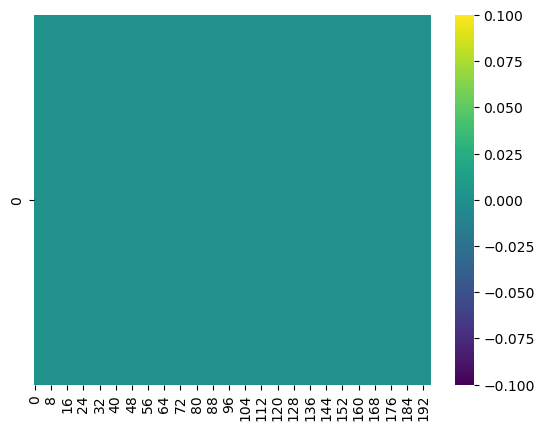

In [28]:
import seaborn as sns
labels = np.load('../../data/train-labels/19150.npy')
sns.heatmap(labels[np.newaxis], cmap = sns.color_palette("viridis", as_cmap=True));

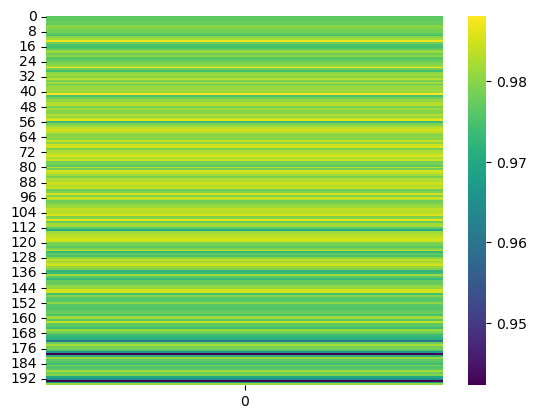

In [31]:
ard = hkl.load('../../data/train-features-ard/19150.hkl')
ard = ard.reshape(ard.shape[0]*ard.shape[1], ard.shape[2])
sns.heatmap(ard[...,0:1], cmap = sns.color_palette("viridis", as_cmap=True));

In [38]:
arr = np.load('../../data/1658X1132Y_txt.npy')
arr.shape

(618, 610, 16)

In [39]:
arr[...,0]

array([[0.4 , 0.3 , 0.2 , ..., 0.2 , 0.15, 0.1 ],
       [0.2 , 0.15, 0.1 , ..., 0.15, 0.1 , 0.1 ],
       [0.2 , 0.15, 0.1 , ..., 0.25, 0.15, 0.1 ],
       ...,
       [0.2 , 0.3 , 0.3 , ..., 0.55, 0.6 , 0.6 ],
       [0.2 , 0.35, 0.35, ..., 0.65, 0.6 , 0.6 ],
       [0.2 , 0.35, 0.35, ..., 0.6 , 0.5 , 0.5 ]], dtype=float32)